### Receipt Classification Using Machine Learning - Test Code 

#### Test classifier(Input is image)-
* For testing we need to send image path to the code "test_classifier.py"
* Example use for python script  :
    python  test_classifier.py  '/image.jpg'
* Example use for jupyter notebook "Test Classifier" section : ./TEST_DATA/dt_23.jpg
* Output will be the string which is either RECEIPT" or "Not a RECEIPT"

## Test Classifier

In [1]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import os
import sys
import string
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from six.moves import input
from sklearn.externals import joblib
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
parser = English()

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [2]:
# Model Descripton

#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Build a list of stopwords to use to filter
stopwords = list(STOP_WORDS)
punctuations = string.punctuation

# Basic function to clean the text 
def clean_text(text):     
    return text.strip().lower()

# Custom tokenizer using spaCy 
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

# Vectorization
classifier = LinearSVC()

# Using Tfidf
tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

# Create the  pipeline to clean, tokenize, vectorize, and classify 
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfvectorizer),
                 ('classifier', classifier)])

./TEST_DATA/positive_sample_2.jpg


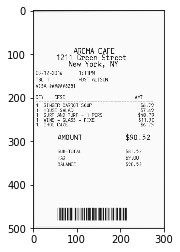

It is RECEIPT


In [4]:
MODEL_PATH = 'model.pkl'
# Loading Model
test = joblib.load(MODEL_PATH)
# Loading a Image
load_img = Image.open(input())
plt.imshow(load_img)
plt.show()
text = pytesseract.image_to_string(load_img)
text1 = [text]

# Predict on given text
pred = test.predict(text1)
print ("It is RECEIPT" if pred == 1 else "Not a RECEIPT")